In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/clean_data.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,lon,lat,severity,num_vehicles,num_casualties,date,doy,time,road_type,Speed_limit,ped_crossing,light_cond,weather,road_cond,hazards,urb_or_rur,police_presence,year
0,-0.169101,51.493429,3,2,1,2012-01-19,5,21,Single carriageway,30,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
1,-0.200838,51.517931,3,2,1,2012-04-01,4,17,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
2,-0.188636,51.487618,3,2,1,2012-10-01,3,10,One way street,30,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
3,-0.200259,51.514325,3,1,1,2012-01-18,4,12,Single carriageway,30,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
4,-0.183773,51.497614,3,1,1,2012-01-17,3,20,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012


## General plotting and analysis to understand how different conditions may affect the fatality of an accident

### Number of fatal accidents by day of week. Week starts with Sunday.

Grouping by day of week for fatal accidents only.

In [4]:
sev1_by_doy = df[df.severity == 1].groupby('doy').count()

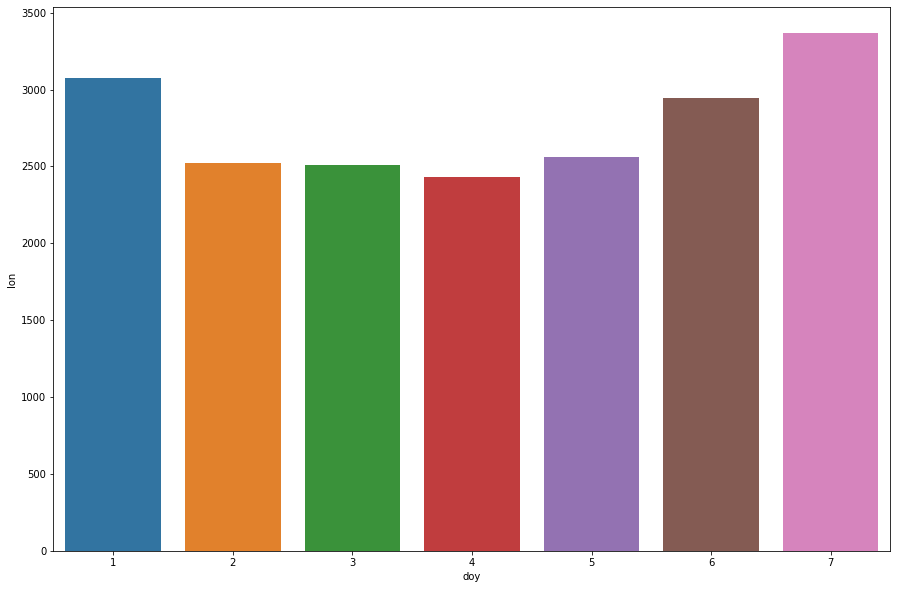

In [5]:
plt.figure(figsize=(15,10))
sns.barplot(sev1_by_doy.index, sev1_by_doy['lon'])
plt.show()

### Number of fatal accidents per road condition

In [6]:
sev1_by_road_cond = df[df.severity == 1].groupby('road_cond').count()

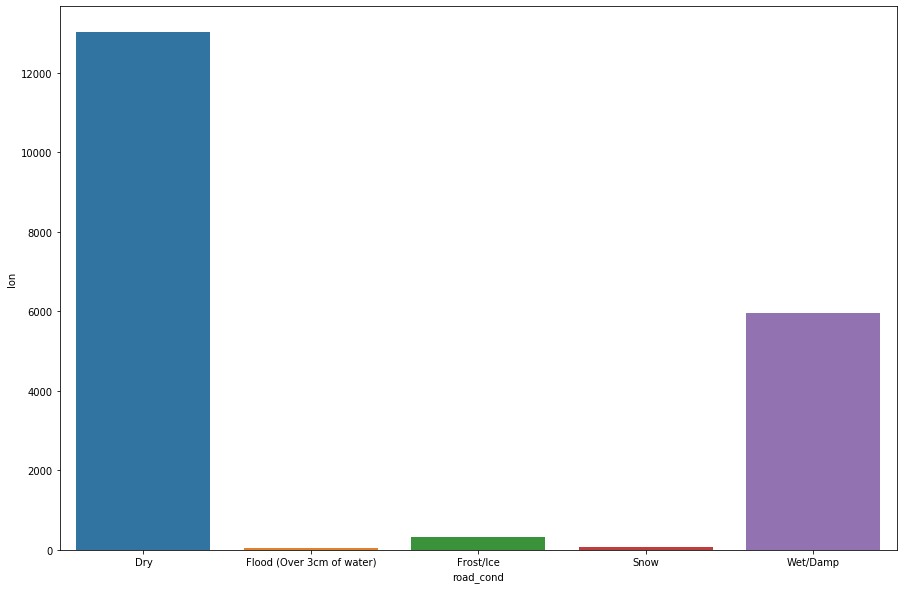

In [7]:
plt.figure(figsize=(15,10))
sns.barplot(sev1_by_road_cond.index, sev1_by_road_cond['lon'])
plt.show()

### Number of accidents per hour of day

In [8]:
sev1_by_hour = df[df.severity == 1].groupby('time').count()

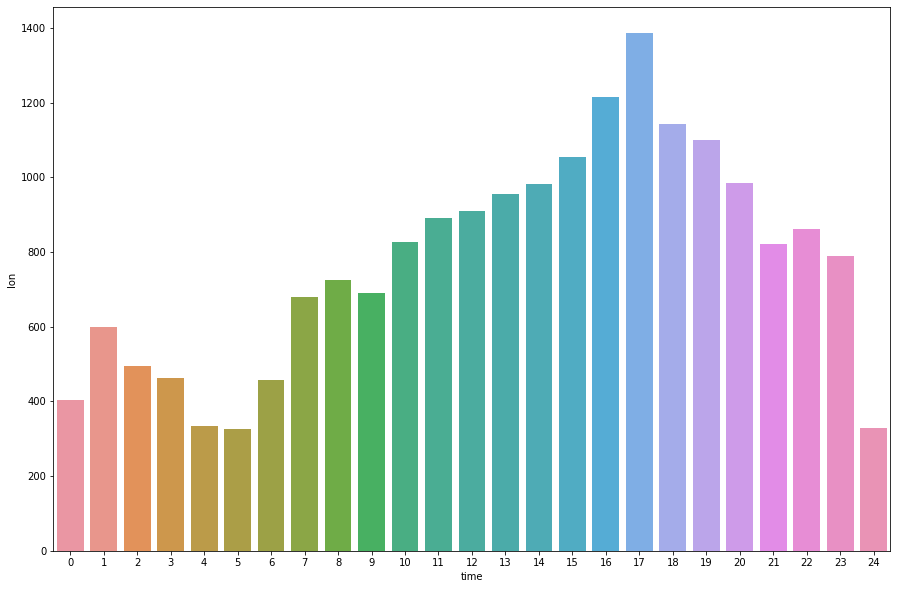

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(sev1_by_hour.index, sev1_by_hour['lon'])
plt.show()

###  Number of fatal accidents per weather condition

In [10]:
sev1_by_weather = df[df.severity == 1].groupby('weather').count()

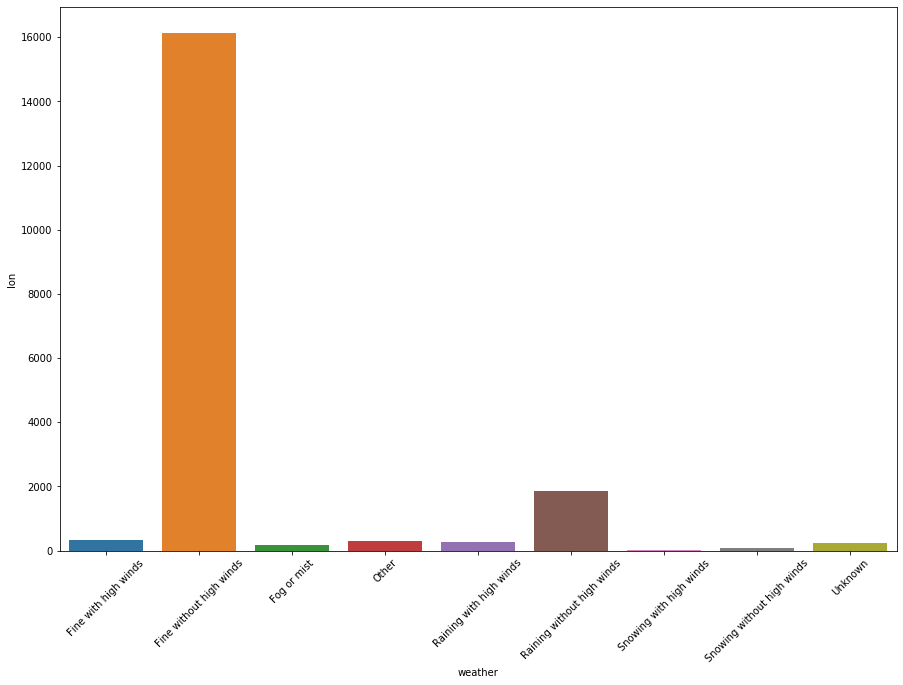

In [11]:
plt.figure(figsize=(15,10))
ax = sns.barplot(sev1_by_weather.index, sev1_by_weather['lon'])
ax.set_xticklabels(sev1_by_weather.index, rotation=45)

plt.show()

### Number of fatal accidents per road speed limit

In [12]:
sev1_by_speed_lim = df[df.severity == 1].groupby(['Speed_limit', 'severity']).count()

In [13]:
sev1_by_speed_lim = sev1_by_speed_lim.droplevel(1)

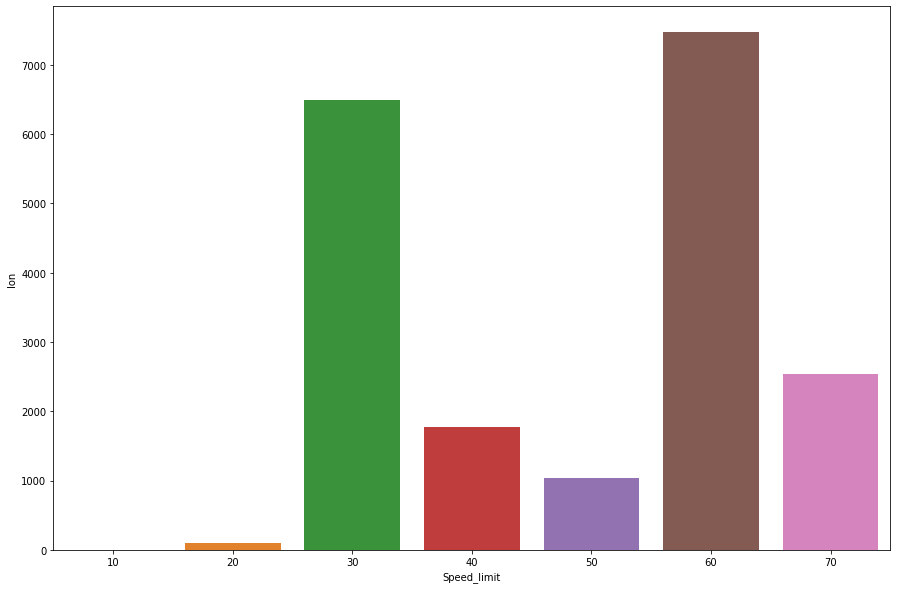

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(sev1_by_speed_lim.index, sev1_by_speed_lim['lon'])
plt.show()